In [3]:
# -*- coding: utf-8 -*-

import netCDF4 as nc4
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [4]:
""" ********  FILES TO PLOT  *************
    *****************************************
    tenseur divrot - freeslip
    convergence 1°/4, /8, /16, /48
    0°, 45°
"""

dirt = "/gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/"
dirm = "/gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/MESHMASK/"


ListA = [[16 , 45. , dirt+"EXP_16_ens_fs45_rot_obs/AM98_1m_00010101_00251230_grid_T.nc",
                     dirm+"mesh_mask_n16_t45_obs.nc"],  
         [8 , 0. , dirt+"EXP_8_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n8_t0.nc"]]

ListB = [[4 , 5. , dirt+"EXP_4_een_fs5_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n4_t5.nc"],  
         [8 , 5. , dirt+"EXP_8_een_fs5_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n8_t5.nc"]]

ListE = [[4 , 10. , dirt+"EXP_4_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n4_t10.nc"],  
         [4 , 10. , dirt+"EXP_4_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n4_t10.nc"]]

ListC = [[4 , 30. , dirt+"EXP_4_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n4_t30.nc"],  
         [8 , 30. , dirt+"EXP_8_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n8_t30.nc"]]

ListD = [[4 , 45. , dirt+"EXP_4_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n4_t45.nc"],  
         [8 , 45. , dirt+"EXP_8_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc",
                   dirm+"mesh_mask_n8_t45.nc"]]


Listdt = [ListA,ListE,ListC,ListD]

""" *************************** PARAMETERS
"""

NI = 2 ; NJ = 2
L=2000E3 # 2000 km
vmin = 200 ; vmax = 800
tickszer = [np.float64(i)*L/4. for i in range(5)]
dz=100./3.
N = (vmax-vmin)/dz
cticks = np.arange(200, 800+dz, 100.) # 3 x 100/3
palette = plt.get_cmap('RdBu_r', N)
dpi = 800

In [6]:
fig, ax = plt.subplots(NI,NJ, figsize=(NJ*3,NI*3), dpi = dpi, squeeze=False)

""" *************************** DATA
"""
for i in range(NI):
    for j in range(NJ):
        n,theta,pdtT,pmm = Listdt[j][i]
        dx = 100E3/np.float64(n)
        # reading
        print("... dataframe[%d,%d], n = %d" % (i,j,n))
        dt = nc4.Dataset(pdtT)
        mm = nc4.Dataset(pmm)
        tmask = mm.variables['tmask'][0,0]
        glamt = mm.variables['glamt'][0] ; gphit = mm.variables['gphit'][0]
        # grid
        lx = dx*np.cos((45+theta)*np.pi/180)/np.sqrt(2) ; ly = dx*np.sin((45+theta)*np.pi/180)/np.sqrt(2)
        nx,ny = np.shape(glamt)
        gridx = np.zeros((nx,ny)) ; gridy = np.zeros((nx,ny))
        gridx = glamt - lx ; gridy = gphit - ly
        # data
        ssh = dt.variables['sshmeaned'][-1,:,:] +500.
        data = np.ma.masked_where(tmask==0,ssh)
        # plot
        cf = ax[i][j].pcolormesh(gridx, gridy, data, 
                            vmin=vmin, vmax=vmax, alpha = 1., shading = 'flat',
                            # levels = levels,
                            cmap = palette)
        if i==0:
            c = np.ones_like(glamt)
            ax[i][j].pcolor(gridx, gridy, c, linewidths = 0.1, facecolor='none', edgecolor='w', )
        # ax[i][j].title.set_text(titles[i][j])
        # contour
        # c1= ax[i][j].contour(glamt,gphit, data,
        #                 levels = cticks,
        #                 vmin=vmin,vmax=vmax,
        #                 linewidths =0.3, colors=('k',),linestyles = "solid")
        #ax[i][j].clabel(c1, fmt='%3.0f', colors='k', fontsize=8)
        
        
""" *************************** PRETTY
"""
for i in range(NI):
    for j in range(NJ):
        n,t,pdtT,pmm = Listdt[j][i]
        dx = 100E3/4.
        limx = dx ; limy = dx
         # print(tickszer)
        ax[i][j].set_xlim(-limx,L + limx)
        ax[i][j].set_xticks(tickszer)
        ax[i][j].set_ylim(-limy,L + limy)
        ax[i][j].set_yticks(tickszer)
        ax[i][j].set_xticklabels([]) ; ax[i][j].set_yticklabels([])
        #
        #if (i==NI-1):
        #    ax[i][j].set_xticklabels(["%1.1f" % (x/1E6) for x in tickszer])
        #    ax[i][j].set_xlabel("X (1000 km)", fontsize = 6)
        #
        #if (j==0):
        #    ax[i][j].set_yticklabels(["%1.1f" % (x/1E6) for x in tickszer])
        #    ax[i][j].set_ylabel("Y (1000 km)", fontsize = 6)
        #
        ax[i][j].patch.set_color('0.')
        ax[i][j].xaxis.set_minor_locator(AutoMinorLocator())
        ax[i][j].yaxis.set_minor_locator(AutoMinorLocator())
        ax[i][j].tick_params(axis = "both", which = 'both', width=1., labelsize = 5, pad = 3, \
                             bottom = True, top = True, left = True, right = True)
        ax[i][j].tick_params(which='minor',length = 3)
        ax[i][j].tick_params(which='major',length = 5)
        ax[i][j].set_aspect(aspect='equal') # data coordinate 'equal'


""" *************************** ZOOM
"""
limx = dx ; limy = 2*dx
# print(tickszer)
ax[0,0].set_xlim(-limx,L + limx)
ax[0,0].set_xticks(tickszer)
ax[0,0].set_ylim(0.,L + limy)

plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, \
                    wspace=0.08, hspace=0.04) # ratio de 1 pour 2
save = 1 ; psave = "tools_zoom.png" ; dpi = 800

""" *************************** BOTTOM COLORBAR
"""
#plt.subplots_adjust(left=0, bottom=0.05, right=1, top=0.95, \
#                    wspace=-0.25, hspace=0.1)
#cbar=plt.colorbar(cf, ax=ax[:], shrink=0.8, location = "bottom",
#                  aspect = 40, fraction=0.05,  extend = 'both', pad = 0.05) #
#cbar.set_ticks(cticks)
#cbar.set_ticklabels(["%dm" % s for s in cticks])
#cbar.ax.tick_params(size=0)
#for _ in cticks :
#    cbar.ax.axvline(x=_, c='black', lw = 1.0)
#cbar.ax.axvline(x=[500], c='black', lw = 1.8)
#save = 1 ; psave = "tools_botcbar.png" 
""" *************************** RIGHT COLORBAR
"""

#plt.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, \
#                    wspace=0.08, hspace=-0.25)
#cbar=plt.colorbar(cf, ax=ax[:], shrink=0.8, location = "right",
#                  aspect = 40, fraction=0.05,  extend = 'both', pad = 0.05) #
#cbar.set_ticks(cticks)
#cbar.set_ticklabels(["%dm" % s for s in cticks])
#cbar.ax.tick_params(size=0)
#for _ in cticks :
#    cbar.ax.axhline(y=_, c='black', lw = 1.0)   
#cbar.ax.axhline(y=[500], c='black', lw = 1.8)
#save = 1 ; psave = "tools_rigcbar.png" ; dpi = 800
""" *************************** SAVING
"""

if save :
    print("\nsaving : %s" % psave)
    fig.savefig(psave, dpi = dpi)
    plt.close()
    print("figure closed")
plt.show()




... dataframe[0,0], n = 16


<ipython-input-6-d368e6b596e3>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax[i][j].pcolormesh(gridx, gridy, data,
<ipython-input-6-d368e6b596e3>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[i][j].pcolor(gridx, gridy, c, linewidths = 0.1, facecolor='none', edgecolor='w', )


... dataframe[0,1], n = 4
... dataframe[1,0], n = 8
... dataframe[1,1], n = 4

saving : tools_zoom.png
figure closed


In [18]:
pmm = dirm+"mesh_mask_n4_refined.nc"

mm = nc4.Dataset(pmm)
tmask = mm.variables['tmask'][0,0]
gphit = mm.variables['gphit'][0]
e2t = mm.variables['e2t'][0]
ni,nj = np.shape(e2t)

In [28]:
dy = e2t[:,nj//2]
phi = gphit[:,nj//2]

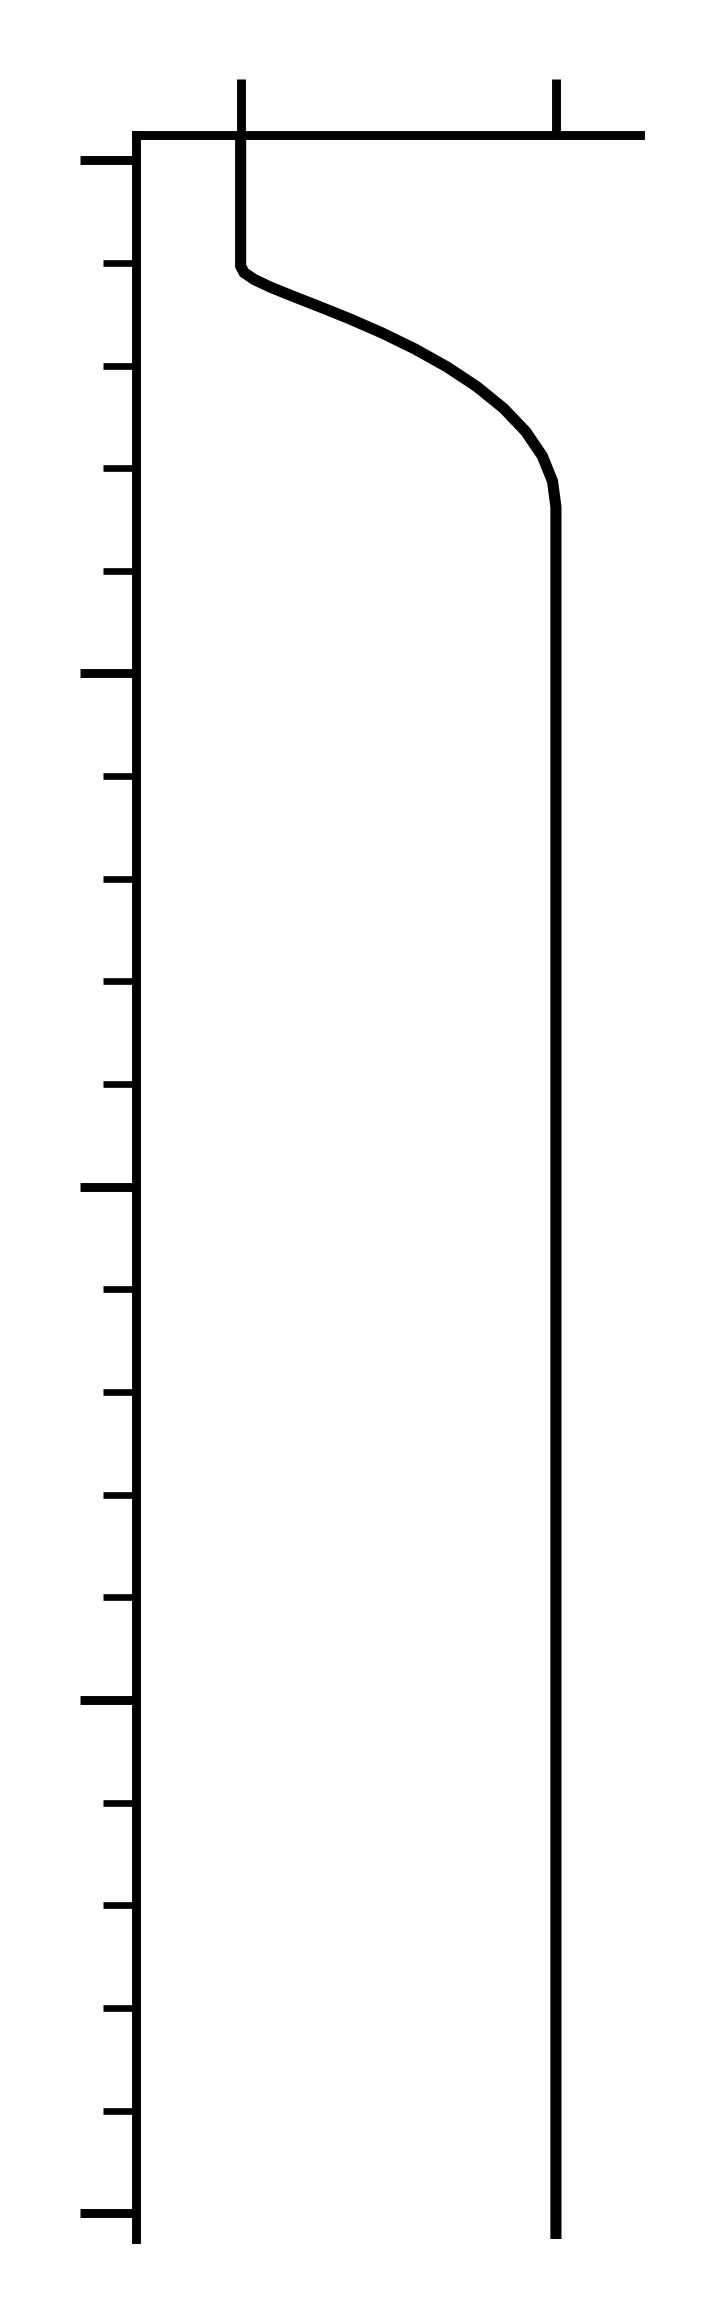

figure closed


In [70]:
fig, ax = plt.subplots(1,1, figsize=(1,1*3), dpi = 800)

ax.plot(dy,phi,'k', linewidth = 1)
dx = 100E3/4.
ticksx = [dx/4,dx]
ticksl = ["1/16°","1/4°"]
ax.set_xticks(ticksx)
#ax.set_xticklabels(ticksl)
ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xlim(0,30000)

limx = dx ; limy = dx
ax.set_ylim(-limy,L + limy)
ax.set_yticks(tickszer)
ax.set_yticklabels([])
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',length = 3)
ax.tick_params(which='major',length = 5)

ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)

plt.tight_layout()
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
plt.show()
fig.savefig("tools_res.png", dpi = 800)
plt.close()
print("figure closed")


